In [4]:
import pandas as pd
import numpy as np
# from keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [6]:
image_path = 'Images/train/'

In [7]:
X = []
for filename in df['filename']:
    img = img_to_array(load_img(image_path + filename, target_size=(28, 28, 1), color_mode='grayscale'))
    X.append(img)
X = np.array(X, dtype='float32')

In [8]:
y = df['label']

In [9]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


### EDA

4


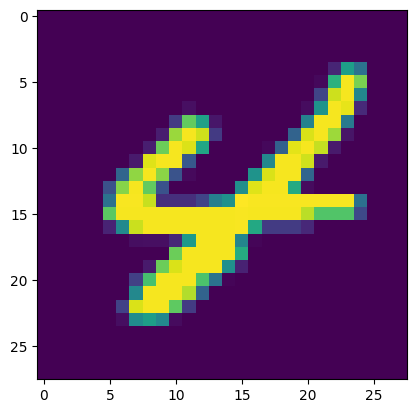

In [10]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28))

9


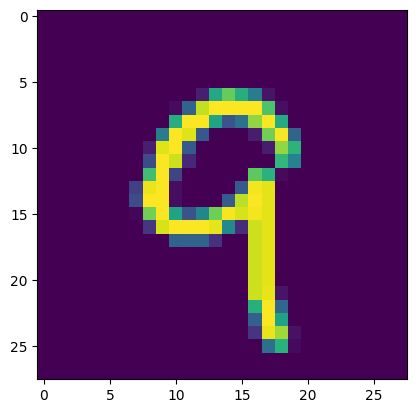

In [11]:
image_index = 5
print(y[image_index])
plt.imshow(X[image_index].reshape(28, 28),)

### Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=40, stratify=np.array(y))

### Normalization

In [13]:

x_train /= 255
x_test /= 255

### Model Creation

In [14]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
input_shape = (28, 28, 1)
output_class = 10
#Model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.3))  
model.add(Dense(output_class, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:

#Model Training
model.fit(x=x_train, y=y_train, batch_size=32,
          epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
1149/1149 [==============================] - 28s 24ms/step - loss: 0.3763 - accuracy: 0.8840 - val_loss: 0.1072 - val_accuracy: 0.9678
Epoch 2/25
1149/1149 [==============================] - 18s 16ms/step - loss: 0.1370 - accuracy: 0.9612 - val_loss: 0.0857 - val_accuracy: 0.9746
Epoch 3/25
1149/1149 [==============================] - 19s 16ms/step - loss: 0.0977 - accuracy: 0.9722 - val_loss: 0.0671 - val_accuracy: 0.9815
Epoch 4/25
1149/1149 [==============================] - 22s 19ms/step - loss: 0.0749 - accuracy: 0.9783 - val_loss: 0.0799 - val_accuracy: 0.9771
Epoch 5/25
1149/1149 [==============================] - 21s 18ms/step - loss: 0.0615 - accuracy: 0.9819 - val_loss: 0.0714 - val_accuracy: 0.9808
Epoch 6/25
1149/1149 [==============================] - 22s 19ms/step - loss: 0.0514 - accuracy: 0.9840 - val_loss: 0.0602 - val_accuracy: 0.9819
Epoch 7/25
1149/1149 [==============================] - 20s 17ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0698 -

### Testing Model

Predicted output: 4


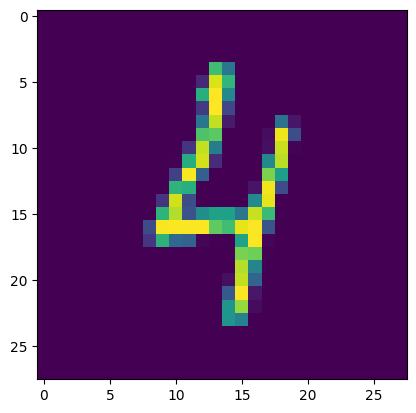

In [17]:
image_index = 10
plt.imshow(x_test[image_index].reshape(28, 28))
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted output:", pred.argmax())

Predicted output: 2


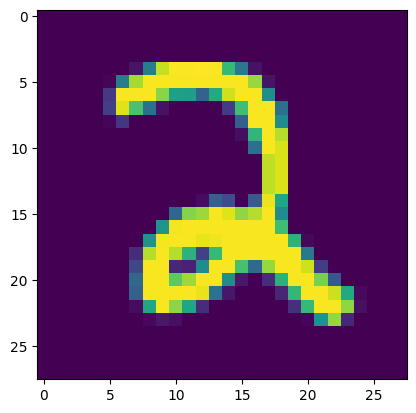

In [18]:
image_index = 77
plt.imshow(x_test[image_index].reshape(28,28))
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

In [19]:
model.save('model_2.h5')